# Taller 6 ACTD 2025-10

In [230]:
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos

In [231]:
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [232]:
print(iris.target_names)

is_virginica = np.where(iris.target == 2, 1, 0)
print(is_virginica)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [233]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, is_virginica, test_size=0.2, random_state=73)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=73)

X_train.shape

(96, 4)

In [234]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[5.6 3.  4.5 1.5]
 [5.7 2.8 4.1 1.3]
 [6.3 2.8 5.1 1.5]]
[[-0.41435469 -0.19016171  0.33855846  0.27213501]
 [-0.28686094 -0.67057023  0.10473391  0.00690698]
 [ 0.47810156 -0.67057023  0.68929529  0.27213501]]


In [235]:
tf.random.set_seed(72)
tf.keras.backend.clear_session()

model_0 = tf.keras.Sequential()
model_0.add(tf.keras.layers.InputLayer(shape=(4,)))
model_0.add(tf.keras.layers.Dense(10, activation="relu"))
model_0.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [236]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [237]:
from tensorflow.keras.metrics import Precision

model_0.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [238]:
history = model_0.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 1.0138 - precision: 0.3236 - val_loss: 1.3266 - val_precision: 0.1250
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0013 - precision: 0.3429 - val_loss: 1.3096 - val_precision: 0.1250
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9891 - precision: 0.3429 - val_loss: 1.2927 - val_precision: 0.1250
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9772 - precision: 0.3429 - val_loss: 1.2760 - val_precision: 0.1250
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9655 - precision: 0.3429 - val_loss: 1.2595 - val_precision: 0.1250
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9540 - precision: 0.3467 - val_loss: 1.2432 - val_precision: 0.1250
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9427 - precision: 0.3467 - val_loss: 1.2271 - val_precision: 0.1250
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9316 - precision: 0.3467 - val_loss: 1.2111 

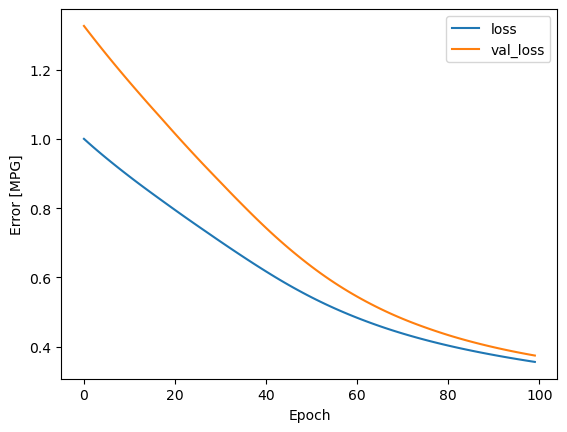

In [239]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [240]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [241]:
def confusion(modelo,mod, X_test, y_test):
    y_true = []
    y_pred = []

    y_pred = modelo.predict(X_test).flatten()

    # Convertir listas a arrays de NumPy
    y_true = np.array(y_test)
    y_pred = np.array(y_pred)

    # Convertir las predicciones a binario (umbral 0.5)
    y_pred_bin = (y_pred > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_bin).ravel()

    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdaderos Positivos (TP): {tp}")

    # Cálculo de métricas

    #Accuracy

    acc_ori=(tp+tn)/(tp+tn+fp+fn)
    print("Accuracy de",str(mod)+f" {acc_ori}")

    #Precision

    pre_ori=(tp/(tp+fp)) 
    print("Precisión de",str(mod)+f" {pre_ori}")

    #Valor de predicción negativa

    vpn_ori=tn/(tn+fn)
    print(f"Valor de predicción negativa de",str(mod)+f" {vpn_ori}")

    #Tasa de verdaderos positivos

    recall_ori=tp/(tp+fn)
    print(f"Recall de",str(mod)+f" {recall_ori}")

    # Tasa de verdaderos negativos

    tnr_ori=tn/(fp+tn)
    print(f"Tasa de verdaderos negativos de",str(mod)+f" {tnr_ori}")

    #Tasa de falsos positivos - Error tipo 1

    error1_ori=fp/(fp+tn)
    print(f"Error tipo 1 de",str(mod)+f" {error1_ori}")

    #Tasa de falsos negativos - Error tipo 2

    error2_ori=fn/(fn+tp)
    print(f"Error tipo 2 de",str(mod)+f" {error2_ori}")

    #AUC
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Calcular el área bajo la curva (AUC)
    roc_auc = auc(fpr, tpr)

    print(f"Área bajo la curva (AUC): {roc_auc:.4f}")

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC - '+mod)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Verdaderos Negativos (TN): 15
Falsos Positivos (FP): 5
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.8333333333333334
Precisión de Modelo original 0.6666666666666666
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.75
Error tipo 1 de Modelo original 0.25
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 0.9150


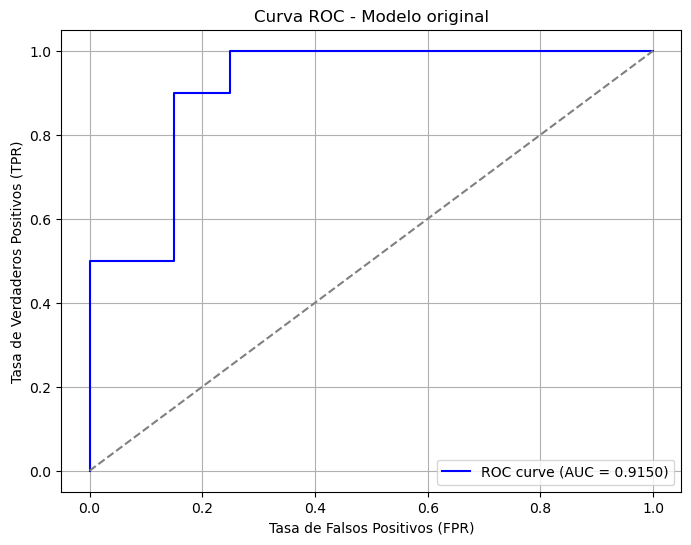

In [242]:
confusion(model_0,'Modelo original',X_test= X_test, y_test=y_test)

## Modelo 2

In [243]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.InputLayer(shape=(4,)))
model_1.add(tf.keras.layers.Dense(12, activation="relu"))
model_1.add(tf.keras.layers.Dense(12, activation="relu"))
model_1.add(tf.keras.layers.Dense(12, activation="relu"))
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [244]:
model_1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [245]:
history = model_1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.7326 - precision_1: 0.3724 - val_loss: 0.7958 - val_precision_1: 0.1250
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7219 - precision_1: 0.3724 - val_loss: 0.7810 - val_precision_1: 0.1250
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7119 - precision_1: 0.3808 - val_loss: 0.7670 - val_precision_1: 0.1250
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7024 - precision_1: 0.3850 - val_loss: 0.7538 - val_precision_1: 0.1250
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6932 - precision_1: 0.3973 - val_loss: 0.7412 - val_precision_1: 0.1364
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6843 - precision_1: 0.4193 - val_loss: 0.7289 - val_precision_1: 0.1500
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6757 - precision_1: 0.4453 - val_loss: 0.7179 - val_precision_1: 0.1579
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6674 - precision

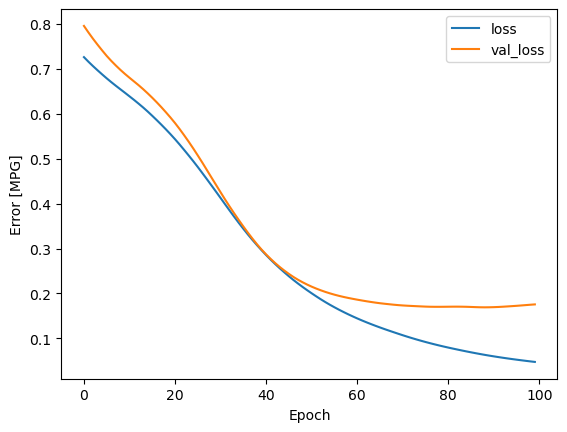

In [246]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Verdaderos Negativos (TN): 18
Falsos Positivos (FP): 2
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.9333333333333333
Precisión de Modelo original 0.8333333333333334
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.9
Error tipo 1 de Modelo original 0.1
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 0.9950


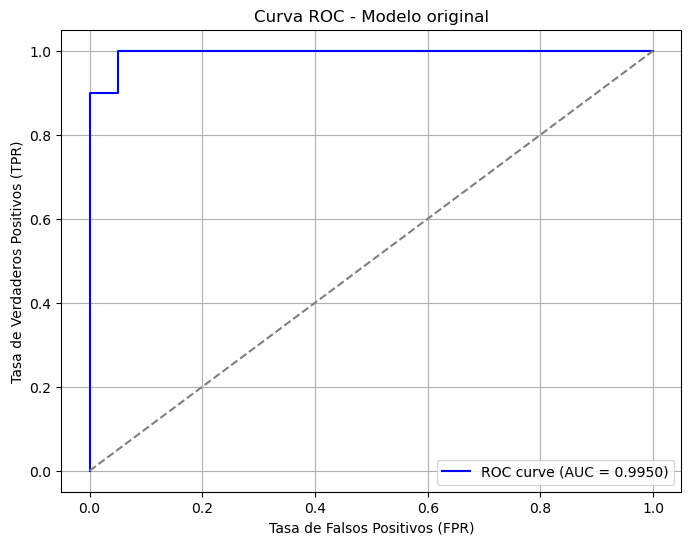

In [247]:
confusion(model_1,'Modelo original',X_test= X_test, y_test=y_test)

## Modelo 3

In [248]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.InputLayer(shape=(4,)))
model_2.add(tf.keras.layers.Dense(8, activation="relu"))
model_2.add(tf.keras.layers.Dense(12, activation="relu"))
model_2.add(tf.keras.layers.Dense(16, activation="relu"))
model_2.add(tf.keras.layers.Dense(20, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717 (2.80 KB)

 Trainable params: 717 (2.80 KB)

 Non-trainable params: 0 (0.00 B)

In [249]:
model_2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [250]:
history = model_2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.7007 - precision_2: 0.0278 - val_loss: 0.6920 - val_precision_2: 0.0000e+00
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6904 - precision_2: 0.1583 - val_loss: 0.6799 - val_precision_2: 0.2000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6803 - precision_2: 0.4525 - val_loss: 0.6690 - val_precision_2: 0.2000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6703 - precision_2: 0.5344 - val_loss: 0.6581 - val_precision_2: 0.1667
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6604 - precision_2: 0.5766 - val_loss: 0.6477 - val_precision_2: 0.1250
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6506 - precision_2: 0.6633 - val_loss: 0.6377 - val_precision_2: 0.2222
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6411 - precision_2: 0.6312 - val_loss: 0.6286 - val_precision_2: 0.2500
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6322 - preci

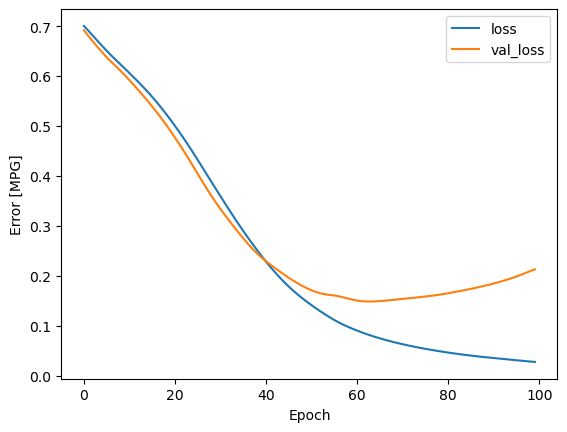

In [251]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Verdaderos Negativos (TN): 18
Falsos Positivos (FP): 2
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.9333333333333333
Precisión de Modelo original 0.8333333333333334
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.9
Error tipo 1 de Modelo original 0.1
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 1.0000


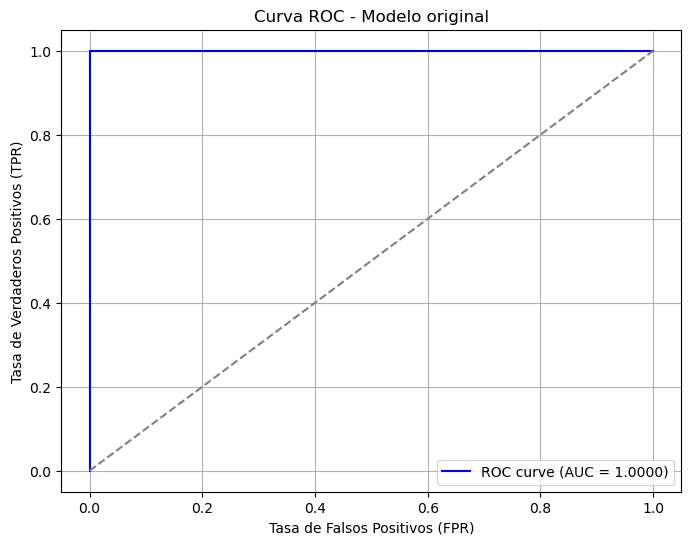

In [252]:
confusion(model_2,'Modelo original',X_test= X_test, y_test=y_test)

## Model 4

In [253]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.InputLayer(shape=(4,)))
model_3.add(tf.keras.layers.Dense(16, activation="relu"))
model_3.add(tf.keras.layers.Dense(12, activation="relu"))
model_3.add(tf.keras.layers.Dense(8, activation="relu"))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397 (1.55 KB)

 Trainable params: 397 (1.55 KB)

 Non-trainable params: 0 (0.00 B)

In [254]:
model_3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[Precision()])

In [255]:
history = model_3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.7213 - precision_3: 0.3658 - val_loss: 0.7937 - val_precision_3: 0.1250
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7075 - precision_3: 0.3753 - val_loss: 0.7798 - val_precision_3: 0.1250
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6949 - precision_3: 0.3827 - val_loss: 0.7680 - val_precision_3: 0.1250
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6836 - precision_3: 0.3860 - val_loss: 0.7575 - val_precision_3: 0.1304
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6734 - precision_3: 0.3981 - val_loss: 0.7474 - val_precision_3: 0.1304
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6643 - precision_3: 0.4119 - val_loss: 0.7380 - val_precision_3: 0.1304
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6556 - precision_3: 0.4230 - val_loss: 0.7289 - val_precision_3: 0.1429
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6471 - precision

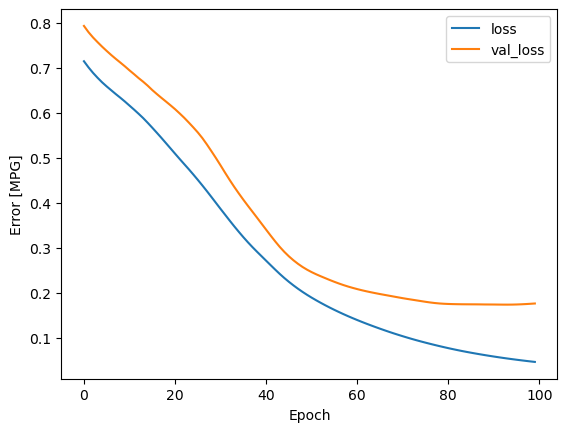

In [256]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'model_0inal'

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Verdaderos Negativos (TN): 18
Falsos Positivos (FP): 2
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 10
Accuracy de Modelo original 0.9333333333333333
Precisión de Modelo original 0.8333333333333334
Valor de predicción negativa de Modelo original 1.0
Recall de Modelo original 1.0
Tasa de verdaderos negativos de Modelo original 0.9
Error tipo 1 de Modelo original 0.1
Error tipo 2 de Modelo original 0.0
Área bajo la curva (AUC): 0.9950


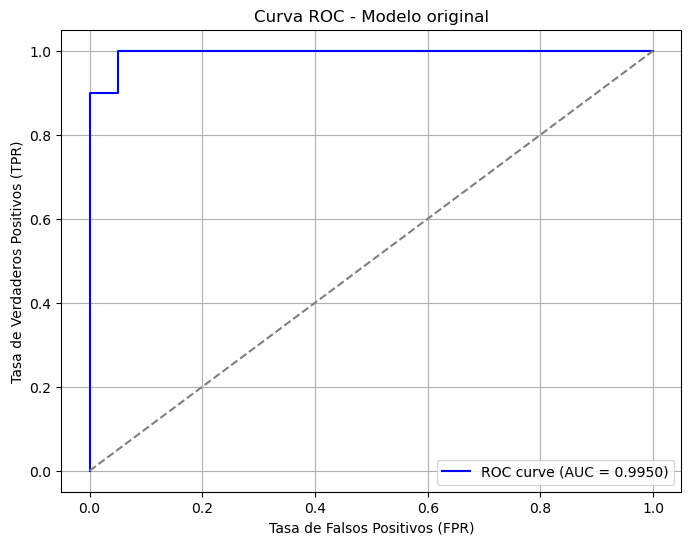

In [257]:
confusion(model_1,'Modelo original',X_test= X_test, y_test=y_test)